# Network visualisations of hashtags and mentions from the scraped Twitter accounts 


Networks are usually described by two sets of items, which ultimately "form" a network: `Nodes` and `Edges`. In mathematical terms, this is known as a `Graph`. Nodes and edges can have metadata associated with them (picture courtesy: T. McKinney). 

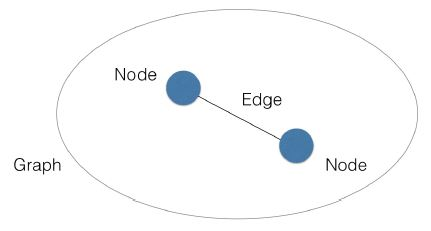


For basic introduction to network analysis, please see [DataCamp's GitHub page](https://github.com/trenton3983/DataCamp/blob/master/2020-05-21_intro_to_network_analysis_in_python.ipynb). You can also check out Trenton McKinney's Notebook [here](https://trenton3983.github.io/files/projects/2020-05-21_intro_to_network_analysis_in_python/2020-05-21_intro_to_network_analysis_in_python.html).

## Section A. Installations and imports
---



In this section, we install and import necessary python packagaes

### Install and import packages

In [1]:
!pip install nxviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.3.tar.gz (40.9 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-3.1.3-cp39-cp39-linux_x86_64.whl size=12062388 sha256=e9997e08b06ec8e50df3c5c9676418ca48e6bce68aae4d8efe7a8943e4c0b2a0
  Stored in directory: /root/.cache/pip/wheels/88/5f/33/d7b8943eba74fdfbd535c83cefcf366c25b0f9cb6424e763e7
Successfully built matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.10.1 requires matplotlib>=3.5.0, but you have matplotlib 3.1.3 which is incompatible.
nxviz 0.7.4 requires matplotlib>=3.3.3, but you have matplotlib

In [5]:
from pathlib import Path
import requests
import networkx as nx
import nxviz as nv
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime, date
from pprint import pprint as pp
from itertools import combinations
import random
from collections import Counter, defaultdict
import numpy as np
import statistics as stats
import operator
import re

In [6]:
print(f'NetworkX version: {nx.__version__}')
print(f'Matplotlib version: {mpl.__version__}')

NetworkX version: 3.0
Matplotlib version: 3.5.3


## Section B. Load the dataset and pre-process the data
---


Below we load the csv dataset downloaded from CrowdTangle (as pandas dataframe), and do data pre-processings. In the `PATH_TO_YOUR_DIRECTORY` string insert the path to your Google Drive folder where your csv dataset is located.

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import os
os.chdir("/content/drive/MyDrive/Twitter-Accounts-Timeline/")

In [9]:
import pandas as pd
import time

### Read the CSV data as pandas dataframes

Below we load the csv datasets as pandas dataframe.

In [19]:
# load csv data as pandas dataframe
csv_data_AlvBotMerged = pd.read_csv("AlvBotMerged.csv", low_memory=False,  lineterminator='\n', sep=',')
csv_data_AlvRealMerged = pd.read_csv("AlvRealMerged.csv", low_memory=False,  lineterminator='\n', sep=',')

csv_data_LarrouBotMerged = pd.read_csv("LarrouBotMerged.csv", low_memory=False,  lineterminator='\n', sep=',')
csv_data_LarrouRealMerged = pd.read_csv("LarrouRealMerged.csv", low_memory=False,  lineterminator='\n', sep=',')


Let us now enquire the shape of the dataset and print available columns to the dataset

In [20]:
print (csv_data_AlvBotMerged.shape)
print (csv_data_AlvRealMerged .shape)

print (csv_data_LarrouBotMerged.shape)
print (csv_data_LarrouRealMerged.shape)

(200, 40)
(580, 40)
(348, 40)
(560, 40)


In [21]:
csv_data_AlvBotMerged.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'conversation_id', 'created_at',
       'date', 'timezone', 'place', 'tweet', 'language', 'hashtags',
       'cashtags', 'user_id', 'user_id_str', 'username', 'name', 'day', 'hour',
       'link', 'urls', 'photos', 'video', 'thumbnail', 'retweet', 'nlikes',
       'nreplies', 'nretweets', 'quote_url', 'search', 'near', 'geo', 'source',
       'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date',
       'translate', 'trans_src', 'trans_dest'],
      dtype='object')

In [22]:
# show one of the csv data sets
csv_data_AlvBotMerged.sample(5)

,Unnamed: 0,Unnamed: 0.1,id,conversation_id,created_at,date,timezone,place,tweet,language,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
109,109,49,1.584893e+18,1.584597e+18,1.666703e+12,2022-10-25 13:01:29,0.0,NaN,@khannakaira1 @sarcar_priyanka @drunkJournalis...,en,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'sarcar_priyanka', 'name': 'P...",NaN,NaN,NaN,NaN
167,167,107,1.574393e+18,1.574065e+18,1.664199e+12,2022-09-26 13:37:10,0.0,NaN,@DeekshaNRaut I know Brahmins who eat non veg ...,en,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'DeekshaNRaut', 'name': 'Deek...",NaN,NaN,NaN,NaN
55,55,15,1.584422e+18,1.584158e+18,1.666591e+12,2022-10-24 05:49:02,0.0,NaN,@faiqk4273 @virendersehwag Bete pokistaniyo ku...,hi,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'faiqk4273', 'name': 'فائق خا...",NaN,NaN,NaN,NaN
6,6,6,1.607252e+18,1.607198e+18,1.672034e+12,2022-12-26 05:48:56,0.0,NaN,"@MrBeast Andrew tate, Logan paul, Jake paul",ht,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'MrBeast', 'name': 'MrBeast',...",NaN,NaN,NaN,NaN
28,28,8,1.571933e+18,1.568983e+18,1.663613e+12,2022-09-19 18:44:41,0.0,NaN,@KhaledBeydoun *Muslim terrorist,en,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'KhaledBeydoun', 'name': 'Kha...",NaN,NaN,NaN,NaN


### Extract and explode hashtags and mentions

Define the dataframe to be processed

In [147]:
#df = csv_data_AlvBotMerged
#df = csv_data_AlvRealMerged
#df = csv_data_LarrouBotMerged
df = csv_data_LarrouRealMerged

Extract hashtags

In [148]:
df ['hashtags_extracted'] = df.tweet.str.findall(r'\B#\w*[a-zA-Z]+\w*').apply(','.join)

Extract mentions

In [149]:
df ['mentions_extracted'] = df.tweet.str.findall(r'(?<![@\w])@(\w{1,25})').apply(','.join)

In [146]:
df.sample(5)

,Unnamed: 0,Unnamed: 0.1,id,conversation_id,created_at,date,timezone,place,tweet,language,...,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,hashtags_extracted,mentions_extracted
238,238,38,1.589821e+18,1.589613e+18,1.667878e+12,2022-11-08 03:25:52,0.0,NaN,@Sumanbarbhaya @AsYouNotWish 😂😂,und,...,NaN,NaN,NaN,"[{'screen_name': 'Sumanbarbhaya', 'name': 'sum...",NaN,NaN,NaN,NaN,,"Sumanbarbhaya,AsYouNotWish"
390,390,70,1.597676e+18,1.597676e+18,1.669751e+12,2022-11-29 19:37:03,0.0,NaN,"""For years, the authorities have been steadily...",en,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,,
521,521,1,1.606319e+18,1.606289e+18,1.671811e+12,2022-12-23 16:02:26,0.0,NaN,@Pakistan_imr @ImranKhanPTI رئیس المنافقين عبد...,ur,...,NaN,NaN,NaN,"[{'screen_name': 'Pakistan_imr', 'name': '𝐏𝐌of...",NaN,NaN,NaN,NaN,,"Pakistan_imr,ImranKhanPTI"
535,535,15,1.591027e+18,1.591026e+18,1.668165e+12,2022-11-11 11:17:52,0.0,NaN,@NowheraOfficial محترمہ آپا عالمہ ڈاکٹر نوہیرا...,ur,...,NaN,NaN,NaN,"[{'screen_name': 'NowheraOfficial', 'name': 'D...",NaN,NaN,NaN,NaN,,NowheraOfficial
173,173,73,1.605941e+18,1.605931e+18,1.671721e+12,2022-12-22 15:00:11,0.0,NaN,@DesiHathoda Woh 72 hoor wala system abhi khat...,tl,...,NaN,NaN,NaN,"[{'screen_name': 'DesiHathoda', 'name': 'DesiH...",NaN,NaN,NaN,NaN,,DesiHathoda


Explode the hashtags and mentions

In [150]:
df = df.assign(hashtags_extracted=df['hashtags_extracted'].str.split(',')).explode('hashtags_extracted')

In [151]:
df = df.assign(mentions_extracted=df['mentions_extracted'].str.split(',')).explode('mentions_extracted')

In [152]:
df.sample(5)

,Unnamed: 0,Unnamed: 0.1,id,conversation_id,created_at,date,timezone,place,tweet,language,...,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,hashtags_extracted,mentions_extracted
354,354,34,1.600399e+18,1.600399e+18,1.670400e+12,2022-12-07 07:55:56,0.0,NaN,This is now the bottom line. But a very import...,en,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,#BJPwillLose,
361,361,41,1.599717e+18,1.599717e+18,1.670237e+12,2022-12-05 10:47:50,0.0,NaN,Good luck @jigneshmevani80 Hope you win and c...,en,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,,jigneshmevani80
427,427,7,1.609304e+18,1.609128e+18,1.672523e+12,2022-12-31 21:43:45,0.0,NaN,@MumukshuSavitri @upma23 Hence proved. Mughals...,en,...,NaN,NaN,NaN,"[{'screen_name': 'MumukshuSavitri', 'name': 'S...",NaN,NaN,NaN,NaN,,upma23
127,127,27,1.607433e+18,1.607376e+18,1.672077e+12,2022-12-26 17:47:28,0.0,NaN,@Himpant94 @TheAhmedShariff Yippee Ka Yayeee M...,tr,...,NaN,NaN,NaN,"[{'screen_name': 'Himpant94', 'name': 'Himansh...",NaN,NaN,NaN,NaN,,TheAhmedShariff
228,228,28,1.592816e+18,1.592808e+18,1.668592e+12,2022-11-16 09:44:22,0.0,NaN,@firki07 @Quratulainb Try chaa Rahi Kali ghata...,in,...,NaN,NaN,NaN,"[{'screen_name': 'firki07', 'name': '🐰', 'id':...",NaN,NaN,NaN,NaN,,firki07


In [153]:
print (df.shape)

(857, 42)


## Section C. Computation of the nodes and edges for Gephi visualisation
---

### Data cleaning

Delete empty entries in `hashtags`

In [156]:
csv_data_hashtags = df[df['hashtags_extracted'].str.strip().astype(bool)]
print (csv_data_hashtags.shape)

(43, 42)


In [157]:
csv_data_hashtags.sample()

,Unnamed: 0,Unnamed: 0.1,id,conversation_id,created_at,date,timezone,place,tweet,language,...,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,hashtags_extracted,mentions_extracted
499,499,19,1.606114e+18,1.605934e+18,1.671762e+12,2022-12-23 02:28:07,0.0,NaN,@Shonalii11 Kyo ??apne ne bhe #JhoomeJoPathaan...,hi,...,NaN,NaN,NaN,"[{'screen_name': 'Shonalii11', 'name': 'RJ Sho...",NaN,NaN,NaN,NaN,#JhoomeJoPathaan,Shonalii11


Delete empty strings in `mentions`

In [158]:
csv_data_mentions = df[df['mentions_extracted'].str.strip().astype(bool)]
print (csv_data_mentions.shape)

(736, 42)


In [159]:
csv_data_mentions.sample(5)

,Unnamed: 0,Unnamed: 0.1,id,conversation_id,created_at,date,timezone,place,tweet,language,...,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,hashtags_extracted,mentions_extracted
163,163,63,1.606327e+18,1.604441e+18,1.671813e+12,2022-12-23 16:32:07,0.0,NaN,@sagarikaghose @_screenshoter screenshot this,en,...,NaN,NaN,NaN,"[{'screen_name': 'sagarikaghose', 'name': 'Sag...",NaN,NaN,NaN,NaN,,sagarikaghose
255,255,55,1.582369e+18,1.582364e+18,1.666101e+12,2022-10-18 13:51:02,0.0,NaN,@AMITtheTHAKUR @ANI Humara Rajkot esa to nahi ...,hi,...,NaN,NaN,NaN,"[{'screen_name': 'AMITtheTHAKUR', 'name': 'Tha...",NaN,NaN,NaN,NaN,,ANI
208,208,8,1.601228e+18,1.601169e+18,1.670597e+12,2022-12-09 14:51:36,0.0,NaN,@kathiyawadi07 Jawahar Bhai chavda 🥲,hi,...,NaN,NaN,NaN,"[{'screen_name': 'kathiyawadi07', 'name': 'KRI...",NaN,NaN,NaN,NaN,,kathiyawadi07
439,439,19,1.609190e+18,1.609188e+18,1.672496e+12,2022-12-31 14:08:42,0.0,NaN,@DDNewslive Diwali? 😂🤦,tl,...,NaN,NaN,NaN,"[{'screen_name': 'DDNewslive', 'name': 'DD New...",NaN,NaN,NaN,NaN,,DDNewslive
543,543,23,1.587756e+18,1.587502e+18,1.667386e+12,2022-11-02 10:40:01,0.0,NaN,@ARYSabiirShakir رئیس المنافقين عبد اللّٰه بن ...,ur,...,NaN,NaN,NaN,"[{'screen_name': 'ARYSabiirShakir', 'name': 'S...",NaN,NaN,NaN,NaN,,ARYSabiirShakir


In this section we compute the nodes and edges of the whole graph, and by using the `NetworkX` python package, create the graph. 

It is possible to choose any `source` and `target` field as one wishes. Some possible examples are:


> `source`: username, `target`: query => shows the mapping of accounts and topics.


The `nodes.csv` and `edges.csv` files created below can be imported to visualisation softwares like Gephi to make interactive visualisations. 

Define the particular dataframe you want to use for computing the nodes

In [177]:
csv_data = csv_data_mentions
#csv_data = csv_data_hashtags

### Compute the graph edges and nodes

In [87]:
csv_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'conversation_id', 'created_at',
       'date', 'timezone', 'place', 'tweet', 'language', 'hashtags',
       'cashtags', 'user_id', 'user_id_str', 'username', 'name', 'day', 'hour',
       'link', 'urls', 'photos', 'video', 'thumbnail', 'retweet', 'nlikes',
       'nreplies', 'nretweets', 'quote_url', 'search', 'near', 'geo', 'source',
       'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date',
       'translate', 'trans_src', 'trans_dest', 'hashtags_extracted',
       'mentions_extracted'],
      dtype='object')

In [178]:
nodelist = pd.DataFrame({'username':csv_data ['username'], 'mention':csv_data ['mentions_extracted']})
#nodelist = pd.DataFrame({'username':csv_data ['username'], 'hashtags':csv_data ['hashtags_extracted']})

> Nodes must have the map: `Id`, `Label`

In [179]:
nodes = pd.DataFrame({'Id':nodelist.iloc[:,0], 'Label':nodelist.iloc[:,0]})

> Edges must have the map: `Source`, `Target`

In [180]:
edges = pd.DataFrame({'Source':nodelist.iloc[:,0], 'Target':nodelist.iloc[:,1]})

In [181]:
print (edges.shape)

(736, 2)


In [182]:
print (nodes)

               Id         Label
0    lonerangerin  lonerangerin
1    lonerangerin  lonerangerin
2    lonerangerin  lonerangerin
3    lonerangerin  lonerangerin
4    lonerangerin  lonerangerin
..            ...           ...
555   dryahyakazi   dryahyakazi
556   dryahyakazi   dryahyakazi
557   dryahyakazi   dryahyakazi
558   dryahyakazi   dryahyakazi
559   dryahyakazi   dryahyakazi

[736 rows x 2 columns]


In [183]:
print (edges)

           Source           Target
0    lonerangerin         INCIndia
1    lonerangerin      priyankac19
2    lonerangerin      rssurjewala
3    lonerangerin       Pawankhera
4    lonerangerin      NayakRagini
..            ...              ...
555   dryahyakazi  NowheraOfficial
556   dryahyakazi     AitzazAhsanP
557   dryahyakazi  NowheraOfficial
558   dryahyakazi  NowheraOfficial
559   dryahyakazi  NowheraOfficial

[736 rows x 2 columns]


### Save the edges and nodes to csv

In [175]:
#edges.to_csv('AlvRealMerged_hashtags_edges.csv',index=False) # save the edges into csv 
edges.to_csv('LarrouRealMerged_mentions_edges.csv',index=False) # save the edges into csv 

In [176]:
#nodes.to_csv('AlvRealMerged_hashtags_nodes.csv',index=False) # save the nodes into csv 
nodes.to_csv('LarrouRealMerged_mentions_nodes.csv',index=False) # save the nodes into csv 